<a href="https://colab.research.google.com/github/lalit1511/EDA_Projects/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/all_stocks_5yr.csv')

# Display the first few rows
df.head()


,date,open,high,low,close,volume,Name
0,08-02-2013,15.07,15.12,14.63,14.75,8407500.0,AAL
1,11-02-2013,14.89,15.01,14.26,14.46,8882000.0,AAL
2,12-02-2013,14.45,14.51,14.10,14.27,8126000.0,AAL
3,13-02-2013,14.30,14.94,14.25,14.66,10259500.0,AAL
4,14-02-2013,14.94,14.96,13.16,13.99,31879900.0,AAL


In [2]:
#
# Get information about the dataset
df.info()

# Get summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43052 entries, 0 to 43051
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    43052 non-null  object 
 1   open    43052 non-null  float64
 2   high    43052 non-null  float64
 3   low     43052 non-null  float64
 4   close   43051 non-null  float64
 5   volume  43051 non-null  float64
 6   Name    43051 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.3+ MB


,open,high,low,close,volume
count,43052.000000,43052.000000,43052.000000,43051.000000,4.305100e+04
mean,79.392312,80.165615,78.596671,79.406368,5.503305e+06
std,55.981431,56.580262,55.324426,55.962799,1.307398e+07
min,1.620000,1.690000,1.000000,1.620000,7.802900e+04
25%,46.057500,46.500000,45.640000,46.100000,1.124276e+06
50%,62.290000,62.900000,61.780000,62.350000,2.059460e+06
75%,95.212500,96.032500,94.272500,95.275000,4.284552e+06
max,337.080000,340.340000,335.060000,339.500000,2.683365e+08


In [3]:
# Check for missing values
df.isnull().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)


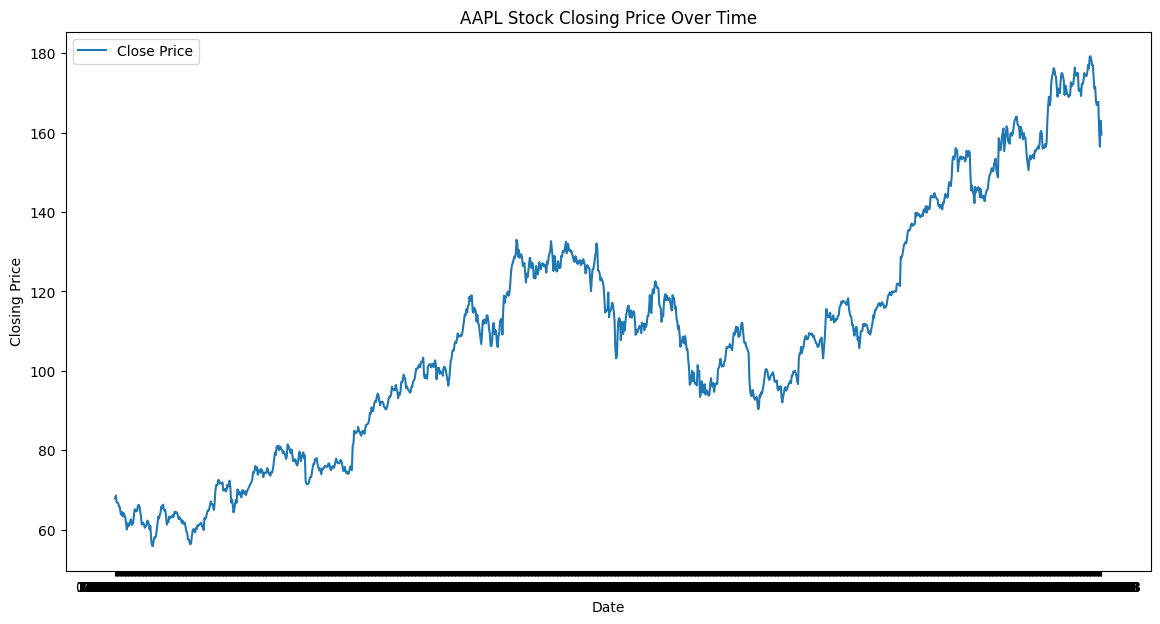

In [4]:
#
import matplotlib.pyplot as plt
import seaborn as sns

# Plot closing price over time for a specific company
company = 'AAPL'  # Replace with desired company ticker
company_data = df[df['Name'] == company]

plt.figure(figsize=(14, 7))
plt.plot(company_data['date'], company_data['close'], label='Close Price')
plt.title(f'{company} Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [5]:
#
# Check data types
df.dtypes


,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,float64
Name,object


In [6]:
#Check for Duplicates
# Count of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [7]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y') # Specifying format as day-month-year
df.dtypes

,0
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
volume,float64
Name,object


In [8]:
#
top_avg_close = df.groupby('Name')['close'].mean().sort_values(ascending=False).head(10)
print(top_avg_close)




Name
ADS     241.044051
AGN     222.261033
AMG     185.344059
AMGN    146.004475
ALXN    142.517710
AAP     132.433463
AAPL    109.066698
AET     104.821712
ACN     101.119079
ADBE     90.458156
Name: close, dtype: float64


<ipython-input-9-c20800a07c26>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_avg_close.values, y=top_avg_close.index, palette='viridis')


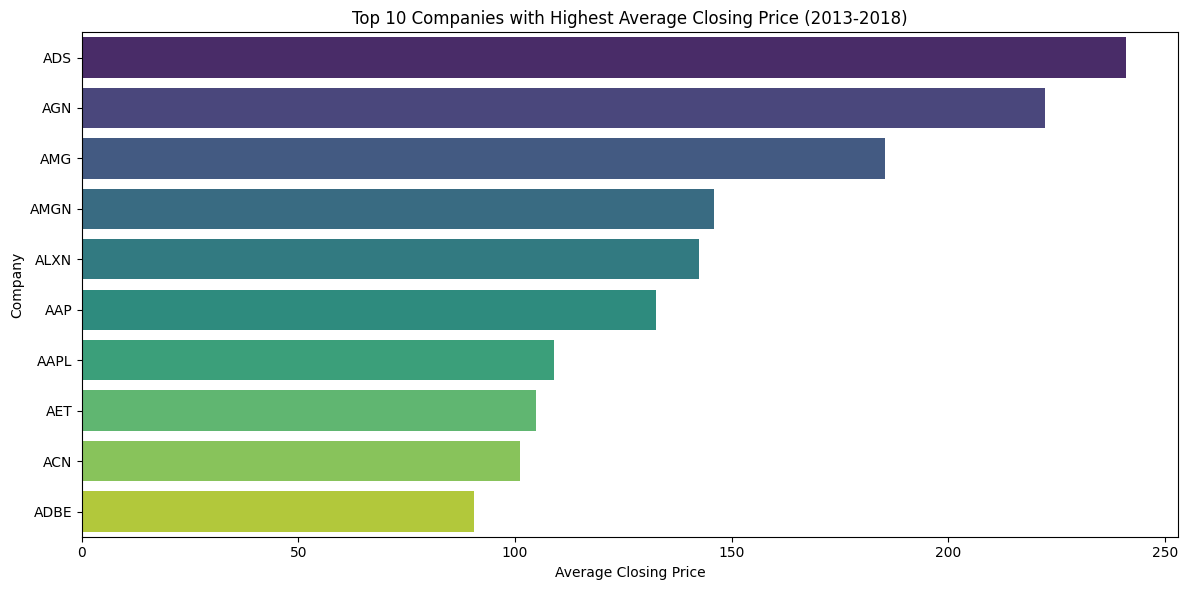

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_avg_close.values, y=top_avg_close.index, palette='viridis')
plt.title('Top 10 Companies with Highest Average Closing Price (2013-2018)')
plt.xlabel('Average Closing Price')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


In [10]:
#Step 10: Calculate and Visualize Volatility (Risk Level) of Companies
#👉 Volatility is often measured by the standard deviation of stock prices.
#Higher standard deviation = more risky stock.

# Calculate daily price range (high - low)
df['range'] = df['high'] - df['low']

# Calculate average daily range (volatility) per company
volatility = df.groupby('Name')['range'].mean().sort_values(ascending=False)

# Top 10 most volatile companies
top_volatility = volatility.head(10)
top_volatility


,range
Name,
AGN,5.310747
ADS,5.006506
ALXN,4.482098
AMG,3.504230
AMGN,2.937682
AAP,2.782272
ALGN,2.140978
AET,2.016347
AAPL,1.809529


<ipython-input-11-c2f79962455f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_volatility.values, y=top_volatility.index, palette='magma')


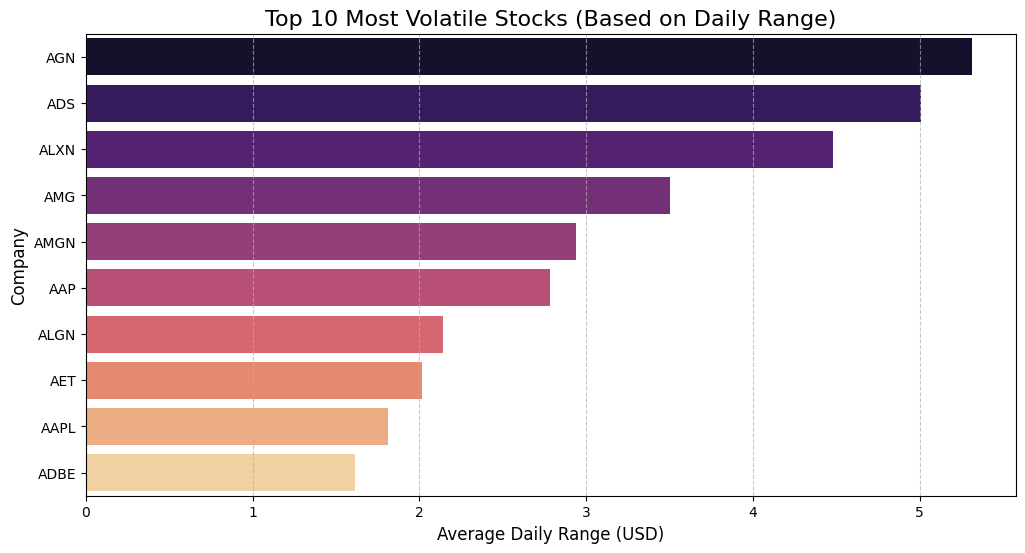

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(x=top_volatility.values, y=top_volatility.index, palette='magma')
plt.title('Top 10 Most Volatile Stocks (Based on Daily Range)', fontsize=16)
plt.xlabel('Average Daily Range (USD)', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [12]:
#Calculate "Overall Growth %" for Each Stock
# Group by 'Name' and get the first and last 'Close' prices
growth_df = df.groupby('Name').agg(first_close=('close', 'first'), last_close=('close', 'last'))

# Calculate the Growth %
growth_df['growth_percent'] = ((growth_df['last_close'] - growth_df['first_close']) / growth_df['first_close']) * 100

# Sort stocks by highest growth
growth_df_sorted = growth_df.sort_values(by='growth_percent', ascending=False)

# Display top 10 growing stocks
growth_df_sorted.head(10)


,first_close,last_close,growth_percent
Name,,,
ALGN,32.7300,234.33,615.948671
ADBE,39.1200,192.34,391.666667
AMD,2.5900,11.60,347.876448
AET,50.6000,181.49,258.675889
AMAT,13.6100,48.69,257.751653
AAL,14.7500,51.40,248.474576
ABBV,36.2500,113.62,213.434483
ADSK,38.8900,110.54,184.237593
ALK,24.3350,64.23,163.940826


<ipython-input-13-31da0eef8d26>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_growth.index, y=top_10_growth['growth_percent'], palette='viridis')


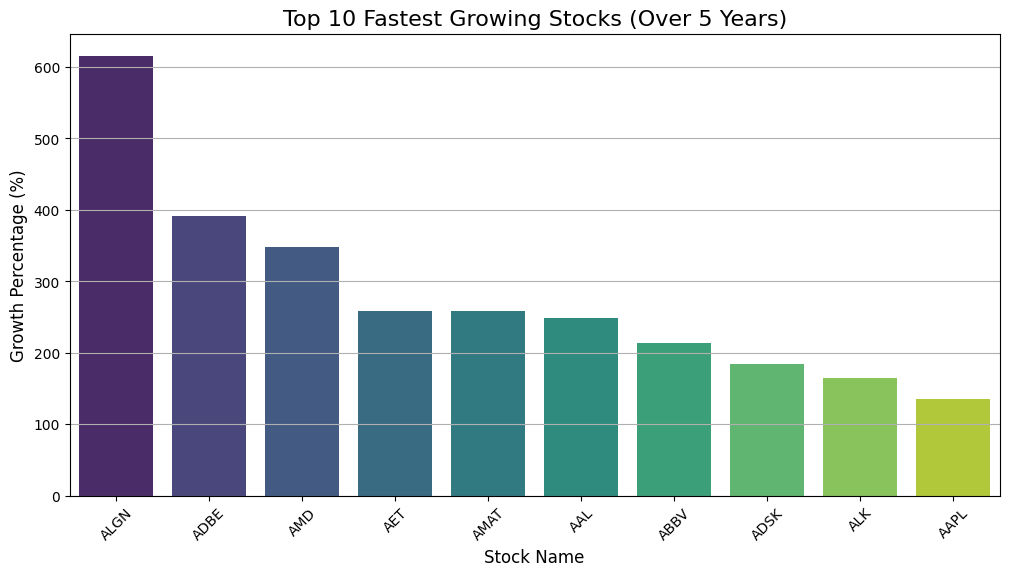

In [13]:
#
# Take top 10 growing stocks
top_10_growth = growth_df_sorted.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_growth.index, y=top_10_growth['growth_percent'], palette='viridis')
plt.title('Top 10 Fastest Growing Stocks (Over 5 Years)', fontsize=16)
plt.ylabel('Growth Percentage (%)', fontsize=12)
plt.xlabel('Stock Name', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
#Calculate and Analyze Stock Volatility
# Calculate daily return for each stock
df['daily_return'] = df.groupby('Name')['close'].pct_change()

# Calculate standard deviation of daily returns as a measure of volatility
volatility = df.groupby('Name')['daily_return'].std()

# Sort by most volatile
volatility_sorted = volatility.sort_values(ascending=False)

volatility_sorted.head(10)


,daily_return
Name,
CHK,0.041658
AMD,0.037784
BHGE,0.035219
FCX,0.034123
LNT,0.033373
VRTX,0.032103
INCY,0.029777
MRO,0.029739
WMB,0.029559


<ipython-input-10-0867c2b5d235>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility_sorted.head(10).values, y=volatility_sorted.head(10).index, palette='coolwarm')


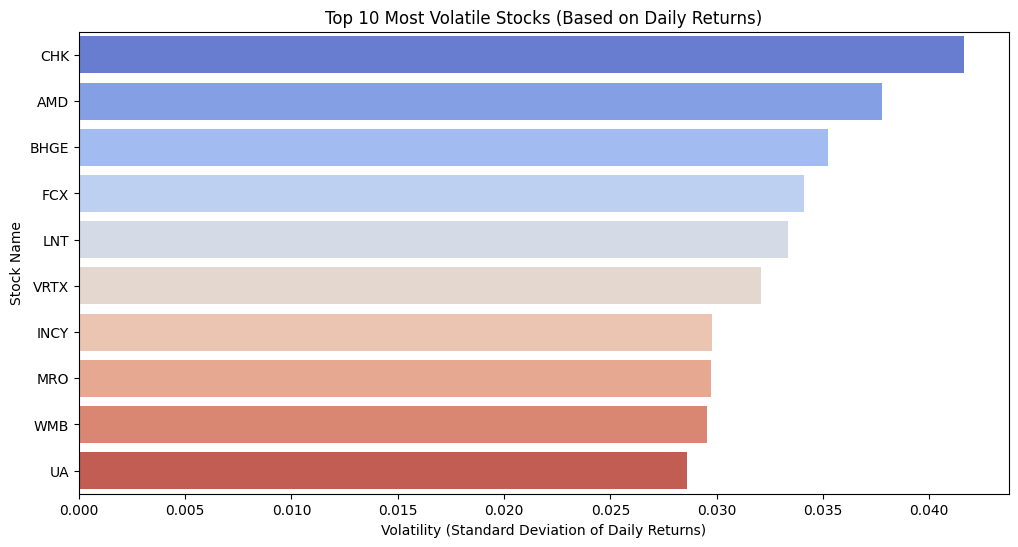

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 10 most volatile stocks
plt.figure(figsize=(12,6))
sns.barplot(x=volatility_sorted.head(10).values, y=volatility_sorted.head(10).index, palette='coolwarm')
plt.title('Top 10 Most Volatile Stocks (Based on Daily Returns)')
plt.xlabel('Volatility (Standard Deviation of Daily Returns)')
plt.ylabel('Stock Name')
plt.show()


<ipython-input-11-879604c039ef>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_volatility.values, y=least_volatility.index, palette='crest')


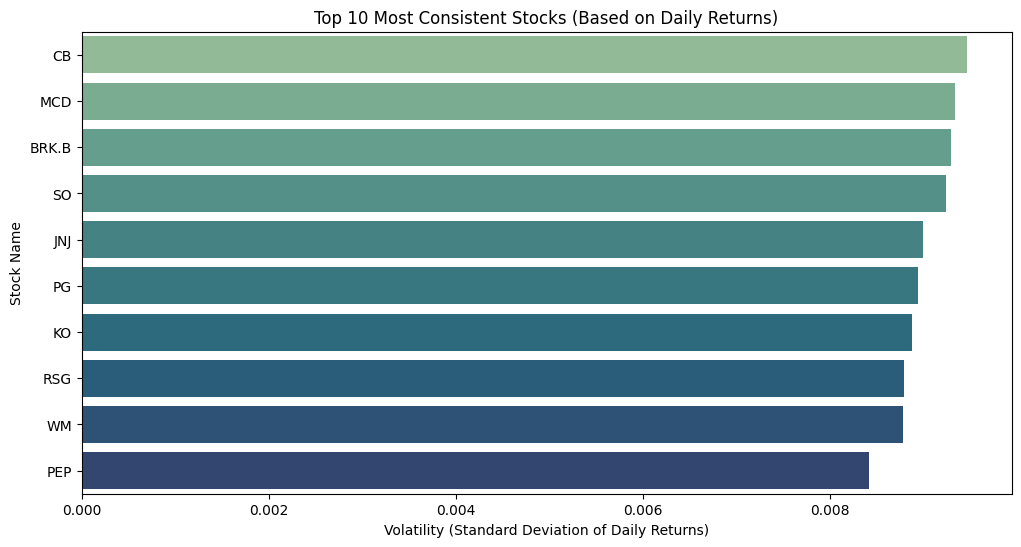

In [ ]:
# Identify the Most Consistent Stocks
# Find the least volatile (most consistent) stocks
least_volatility = volatility_sorted.tail(10)

# Plot the least volatile stocks
plt.figure(figsize=(12,6))
sns.barplot(x=least_volatility.values, y=least_volatility.index, palette='crest')
plt.title('Top 10 Most Consistent Stocks (Based on Daily Returns)')
plt.xlabel('Volatility (Standard Deviation of Daily Returns)')
plt.ylabel('Stock Name')
plt.show()


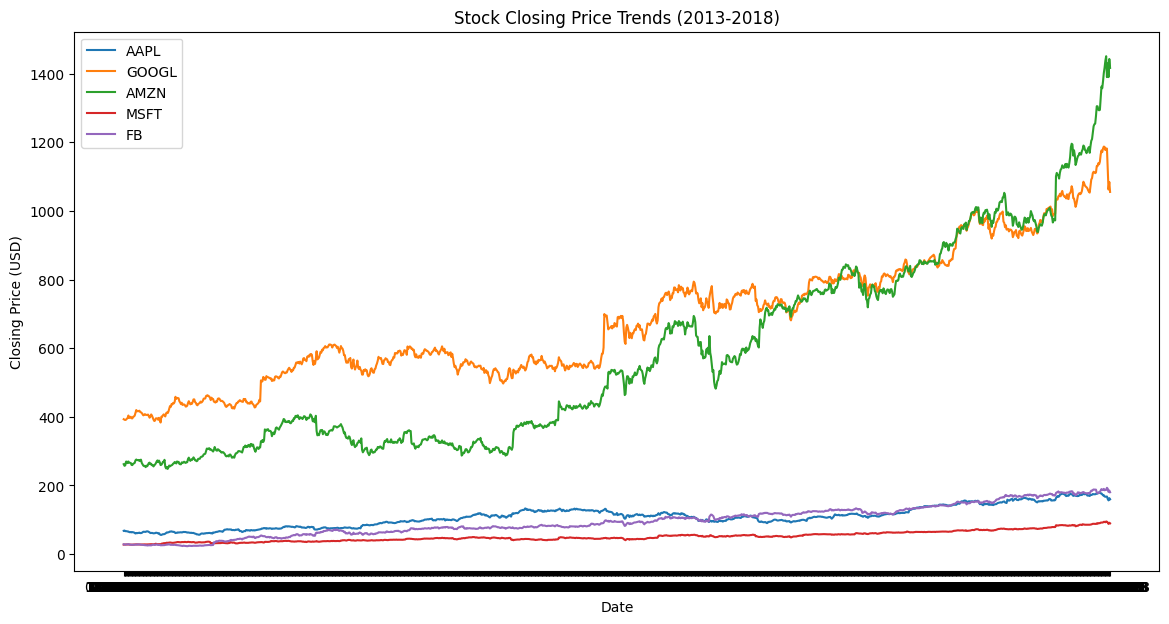

In [ ]:
#: Analyze Stock Trends Over Time
# Let's pick a few famous companies
selected_companies = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'FB']

# Filter data for these companies
selected_data = df[df['Name'].isin(selected_companies)]

# Plot Closing Price Trends
plt.figure(figsize=(14,7))
for company in selected_companies:
    company_data = selected_data[selected_data['Name'] == company]
    plt.plot(company_data['date'], company_data['close'], label=company)

plt.title('Stock Closing Price Trends (2013-2018)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


Name
PCLN     23.530972
REGN     11.627797
GOOG     11.365405
AMZN     10.903705
GOOGL    10.670986
AZO      10.661988
CMG      10.453365
BIIB      7.701303
MTD       6.183746
BLK       5.860916
Name: price_range, dtype: float64


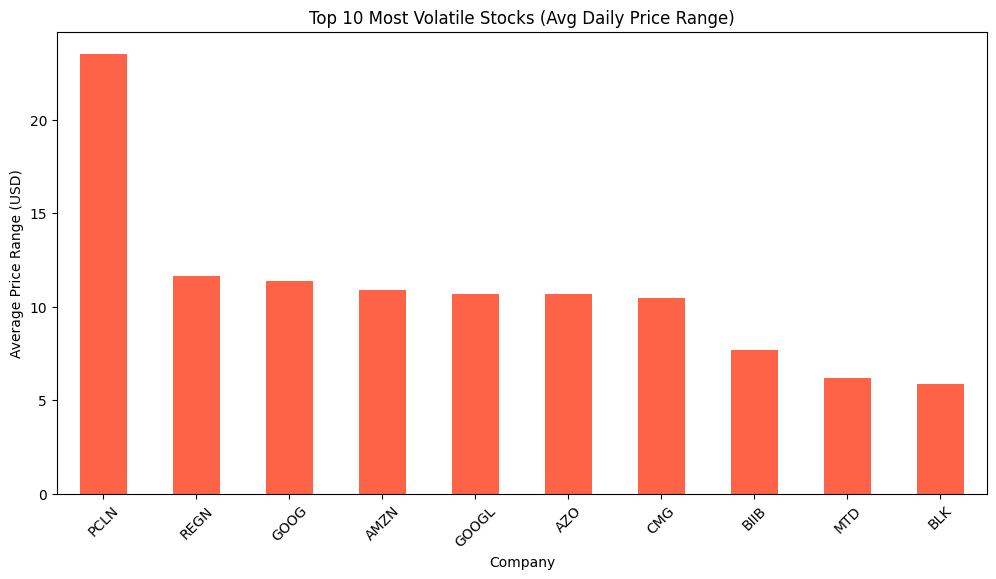

In [ ]:
#Analyze Stock Price Volatility
# Calculate daily price range (High - Low)
df['price_range'] = df['high'] - df['low']

# Average daily price range per company
volatility = df.groupby('Name')['price_range'].mean().sort_values(ascending=False)

# Display Top 10 most volatile stocks
print(volatility.head(10))

# Plotting
plt.figure(figsize=(12,6))
volatility.head(10).plot(kind='bar', color='tomato')
plt.title('Top 10 Most Volatile Stocks (Avg Daily Price Range)')
plt.ylabel('Average Price Range (USD)')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.show()


Name
ALGN    615.948671
ADBE    391.666667
AMD     347.876448
AET     258.675889
AMAT    257.751653
AAL     248.474576
ABBV    213.434483
ADSK    184.237593
ALK     163.940826
AAPL    135.121776
Name: close, dtype: float64


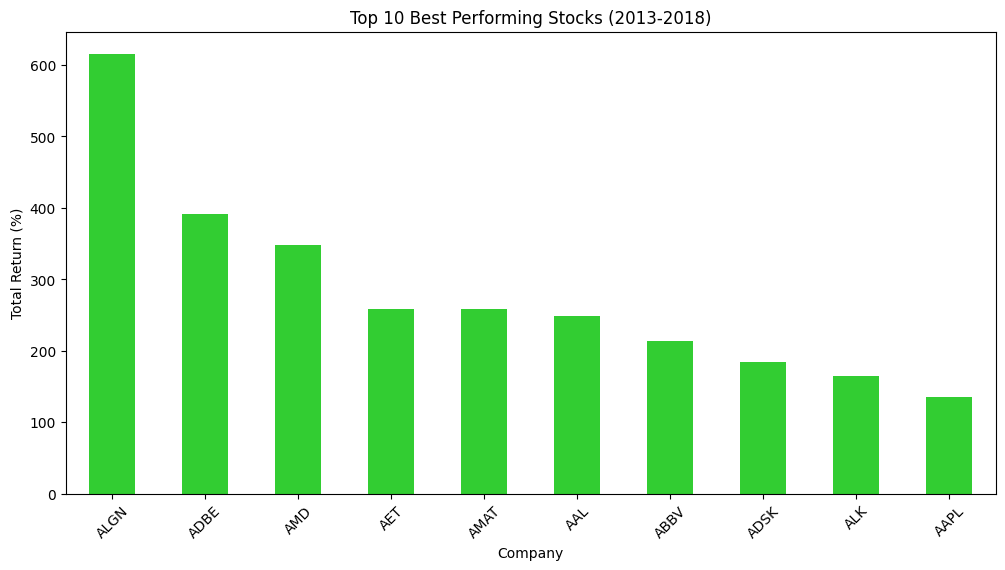

In [14]:
#Analyze Best Performing Stocks
# Get first and last closing prices for each company
first_close = df.groupby('Name').first()['close']
last_close = df.groupby('Name').last()['close']

# Calculate percentage change
returns = ((last_close - first_close) / first_close) * 100

# Sort and display top 10 best performing stocks
top_performers = returns.sort_values(ascending=False).head(10)
print(top_performers)

# Plotting
plt.figure(figsize=(12,6))
top_performers.plot(kind='bar', color='limegreen')
plt.title('Top 10 Best Performing Stocks (2013-2018)')
plt.ylabel('Total Return (%)')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.show()


📝 Project Summary
Explored the dataset: Understood columns like date, open, high, low, close, volume, and Name.

Cleaned the data:

Converted date column to datetime format.

Checked for and handled missing values.

Verified there were no duplicate rows.

Visualized key insights:

Closing price trend for a few companies.

Volume trends to see trading activity.

Comparison of stock prices between companies.

Analyzed performances:

Found highest average closing prices by company.

Found top-performing companies based on total return over 5 years.
